In [384]:
import pandas as pd #табличные данные
import matplotlib.pyplot as plt


## Подготовка работы

Импортируем файл, считываем данные и определяем общий функционал для обработки данных

In [385]:
# путь к файлу в файловой систем
path = './netflix_titles.csv';
# считывание данных из файла
data = pd.read_csv(path, sep = ',');

# функция для разбиения данных в колонке
def split_values(value: str):
    if (isinstance(value, str) == False):
        return value

    splitted = value.split(', ')
    if (isinstance(splitted, str)):
        return [splitted]
    else:
        return splitted

# функция, которая возвращает обработанные нужные нам данные из DataFrame
def get_filtered_series(df: pd.DataFrame, path: str, count_filter: int):
    return (
        df[path]
            .explode()
            .dropna()
            .apply(split_values)
            .explode()
            .value_counts()
            .where(lambda count: count >= count_filter)
            .dropna()
    )

# Выводим на экран данные
data[::2]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
...,...,...,...,...,...,...,...,...,...,...,...,...
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


## Какая страна произвела наибольшее количество контента за все года

Построим горизонтальный график распределения количества фильмов по странам. Для этого:
1. Возьмем данные по столбцу "Страна"
1. Отсеим NaN значения
1. Разобъем значения стран по-отдельности, если у фильма их было несколько
1. Отфильтруем страны, снявшие менее 10 фильмов
1. Сконфигурируем график

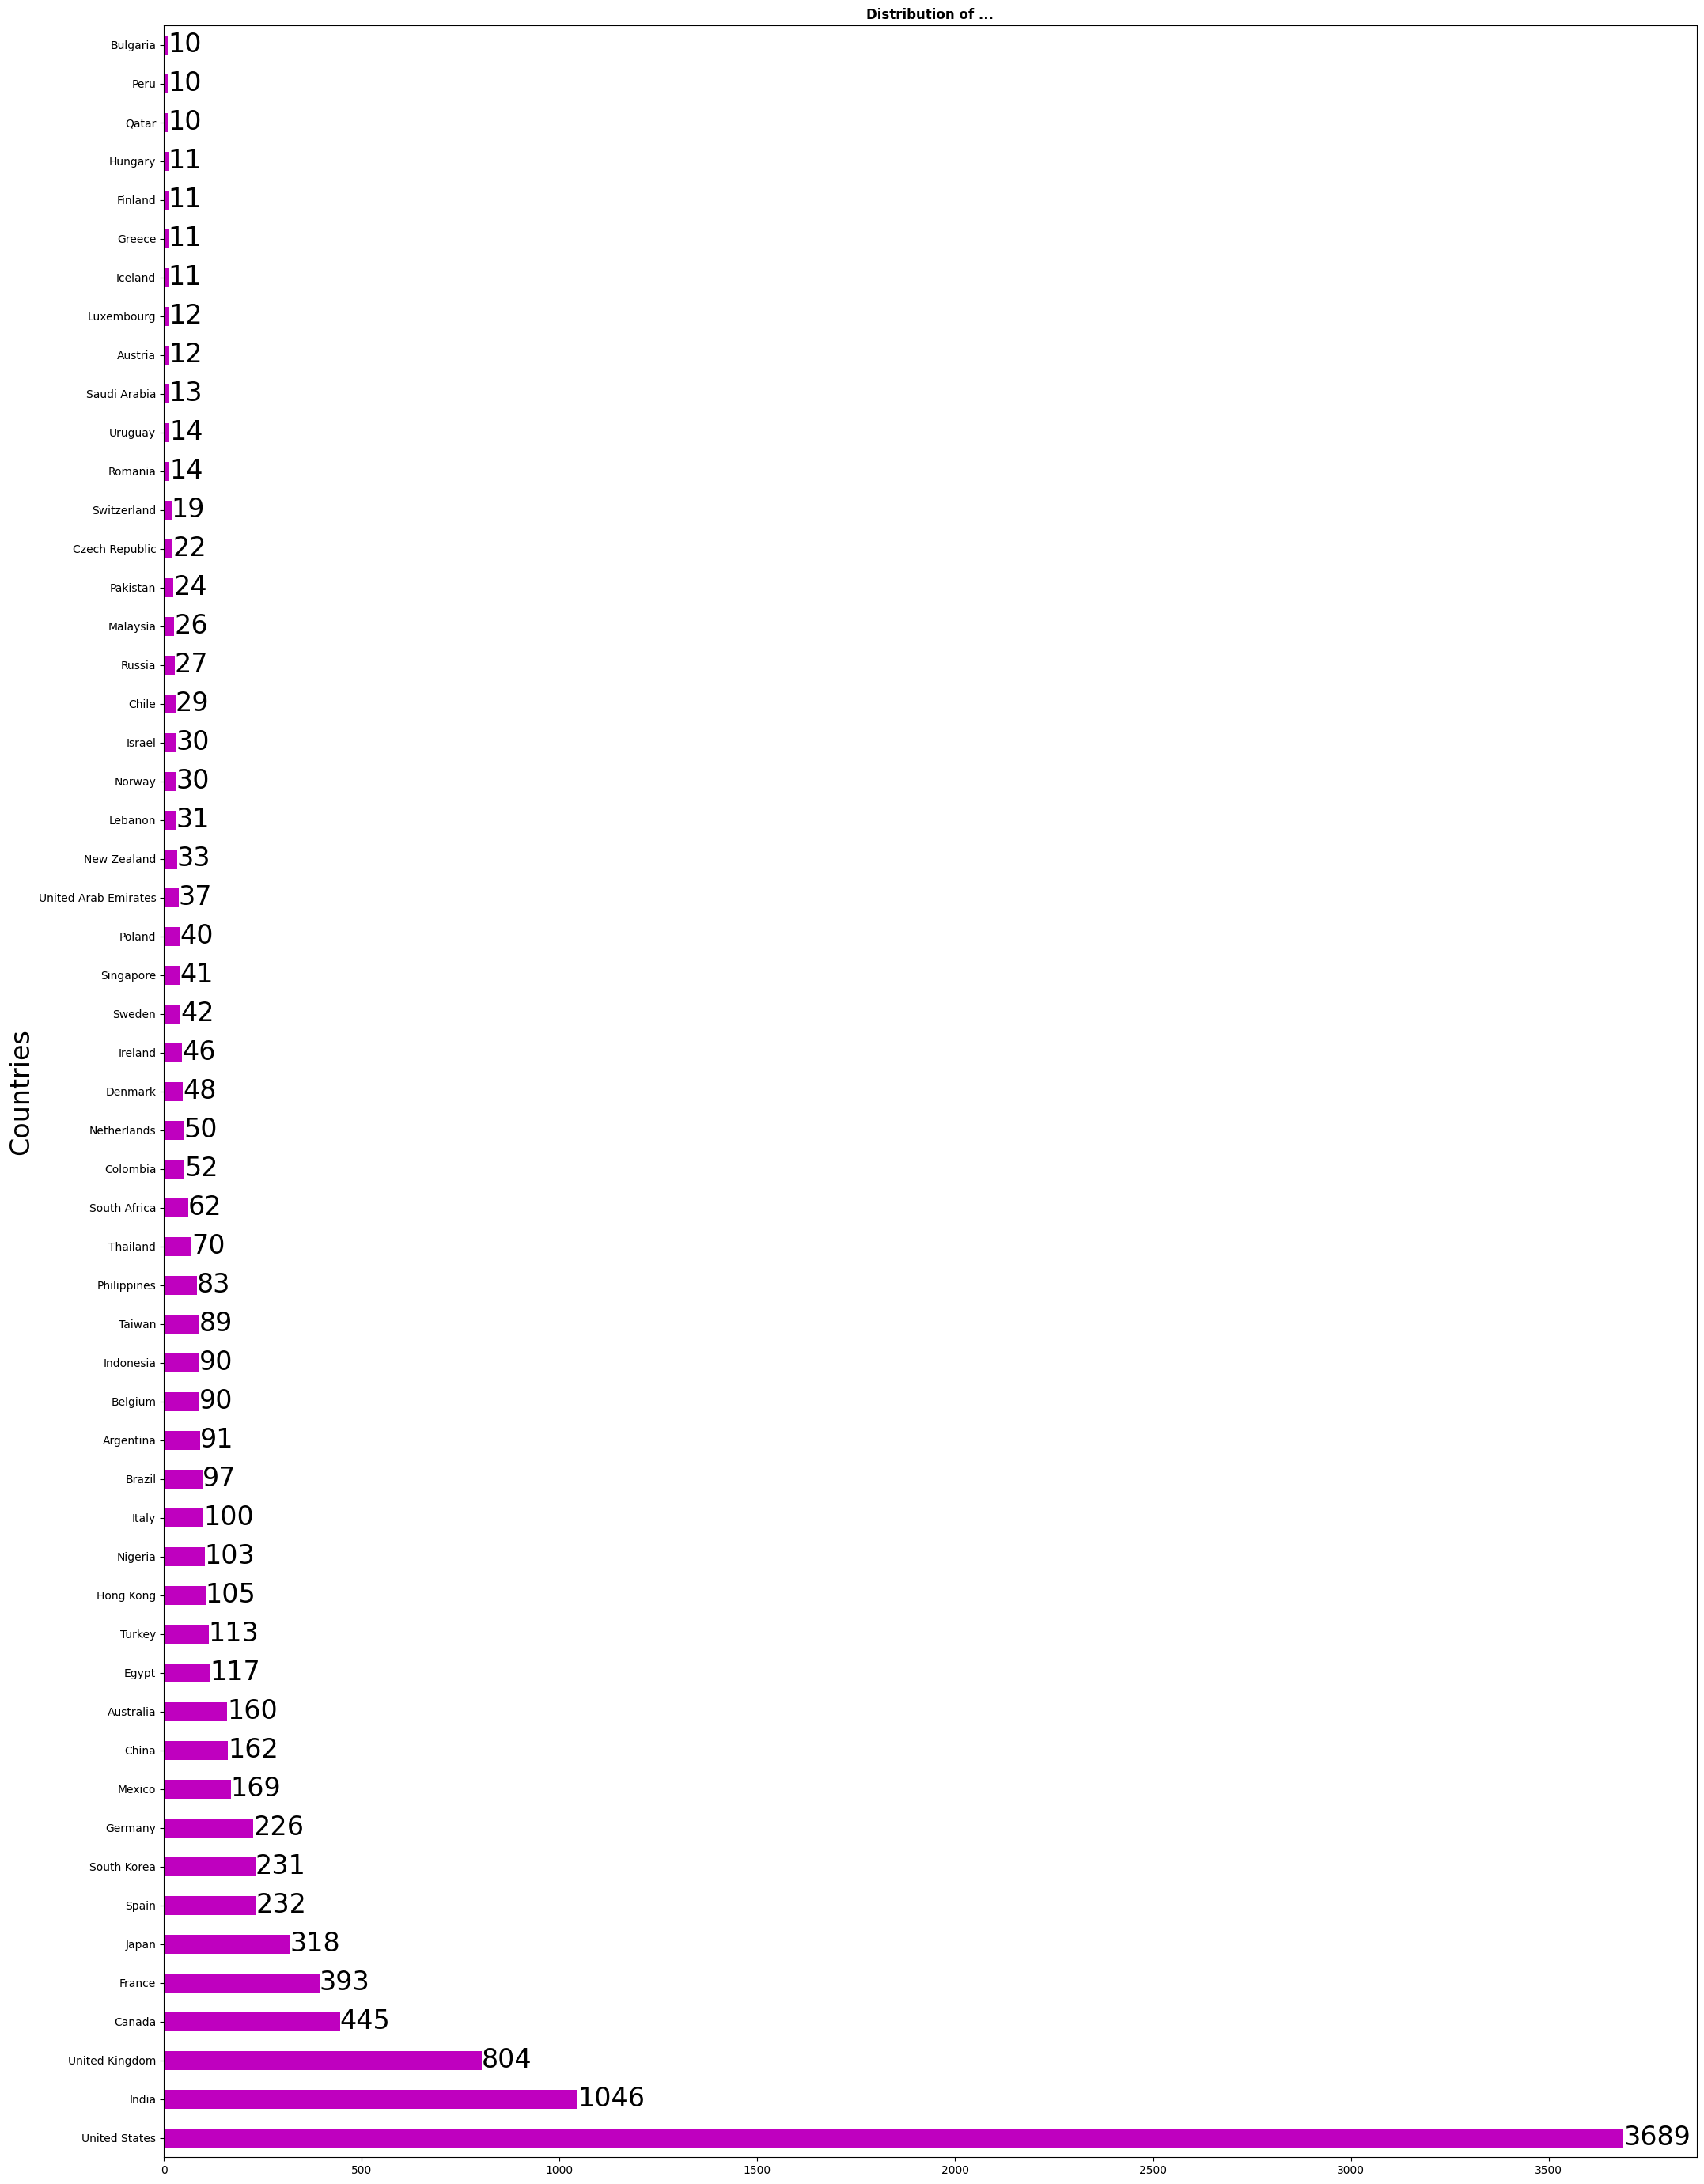

In [386]:
countries_series = get_filtered_series(data, 'country', 10)

fig, ax = plt.subplots(figsize = (25, 35)) #фигуры, изменить размер
ax = countries_series.plot(kind = 'barh', color = 'm') #горизонтальная плоскость перешла в вертикальную
ax.bar_label(ax.containers[0], fontsize = 24) #показало конкрентные числова справа
plt.ylabel('Countries', fontsize = 24) #пояснение по оси У
plt.title('Distribution of ...', fontweight = 'bold')
plt.show()

## Какие режиссеры самые продуктивные за последние 10 лет

Построим горизонтальный график распределения количества фильмов по режиссерам. Для этого:
1. Возьмем данные по столбцу "Режиссер"
1. Отсеим NaN значения
1. Разобъем значения режиссеров по-отдельности, если у фильма их было несколько
1. Отфильтруем режиссеров, снявших менее 10 фильмов
1. Сконфигурируем график

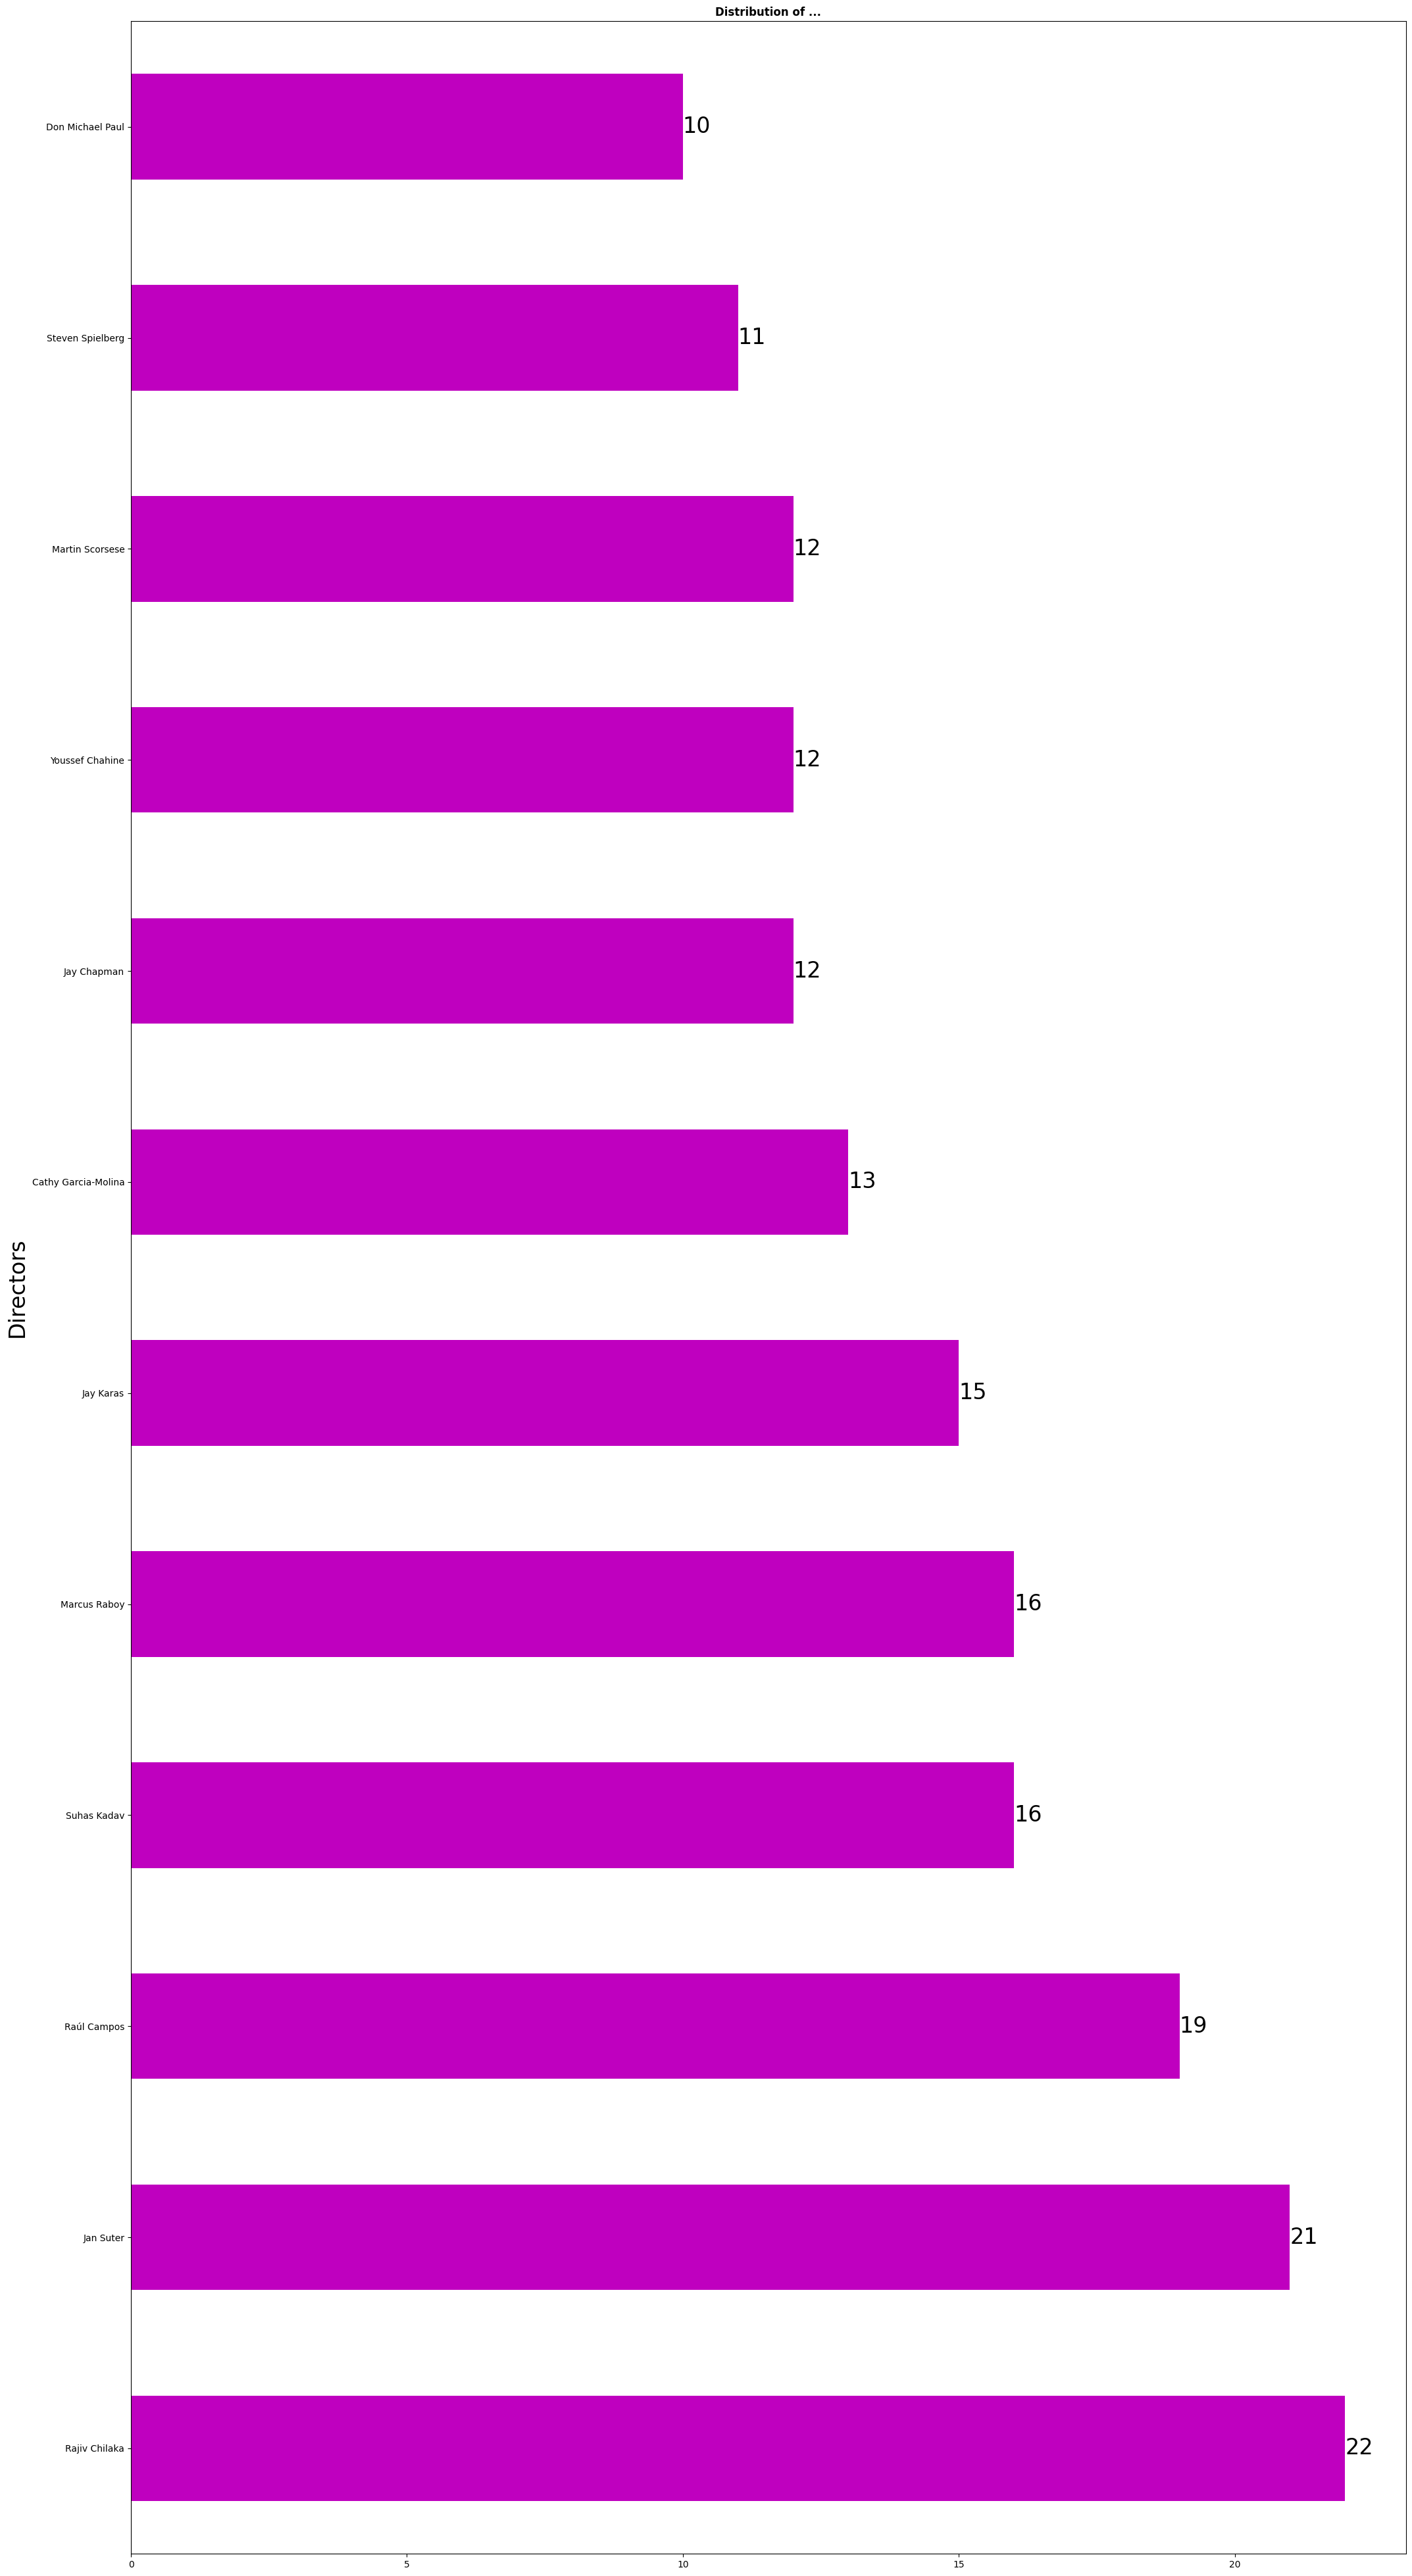

In [387]:
director_series = get_filtered_series(data, 'director', 10)

fig, ax = plt.subplots(figsize = (25, 50)) #фигуры, изменить размер
ax = director_series.plot(kind = 'barh', color = 'm') #горизонтальная плоскость перешла в вертикальную
ax.bar_label(ax.containers[0], fontsize = 24) #показало конкрентные числова справа
plt.ylabel('Directors', fontsize = 24) #пояснение по оси У
plt.title('Distribution of ...', fontweight = 'bold')
plt.show()

## Как росла популярность сериалов с каждым годом?

Построим горизонтальный график распределения количества фильмов по режиссерам. Для этого:
1. Возьмем данные по столбцу "Режиссер"
1. Отсеим NaN значения
1. Разобъем значения режиссеров по-отдельности, если у фильма их было несколько
1. Отфильтруем режиссеров, снявших менее 10 фильмов
1. Сконфигурируем график

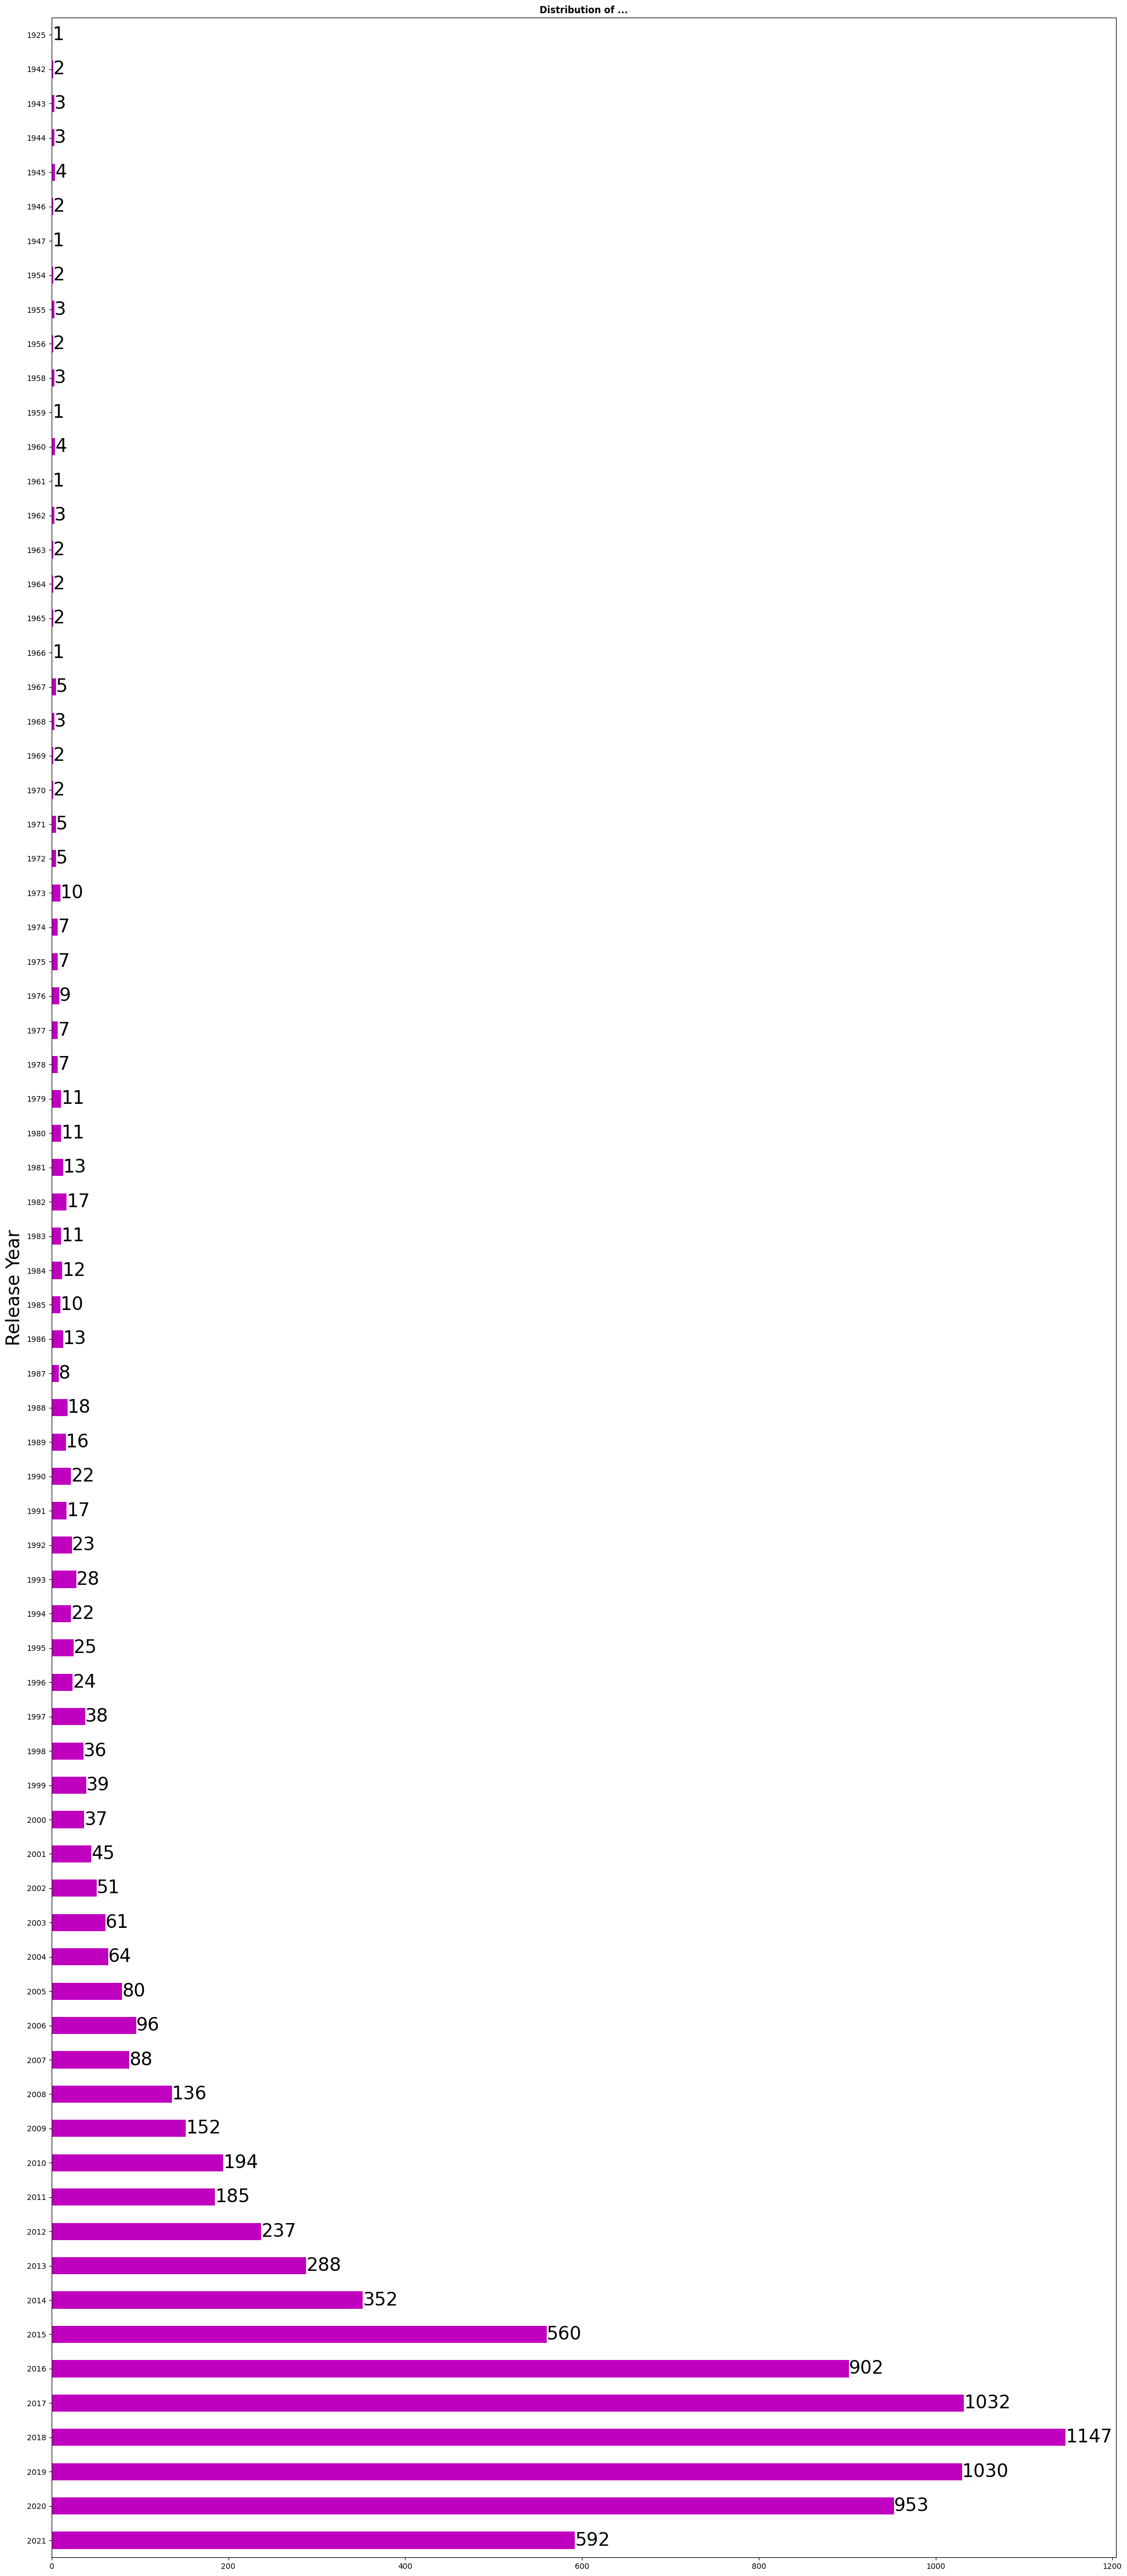

In [388]:
release_year_series = get_filtered_series(data, 'release_year', 0).sort_index(ascending=False)

fig, ax = plt.subplots(figsize = (25, 60)) #фигуры, изменить размер
ax = release_year_series.plot(kind = 'barh', color = 'm') #горизонтальная плоскость перешла в вертикальную
ax.bar_label(ax.containers[0], fontsize = 24) #показало конкрентные числова справа
plt.ylabel('Release Year', fontsize = 24) #пояснение по оси У
plt.title('Distribution of ...', fontweight = 'bold')
plt.show()

## В каких странах какой жанр и тип контента наиболее часто производим?

Построим графики распределения жанров и типов контента по топ-5 странам. Для этого:
1. Возьмем топ-5 стран производителей
1. Запишем их в датасет для группировки
1. Построим график по типу контента
    1. Группируем данные по стране из топ-5 и типу контента
    1. Задаем параметры графика
1. Построим график по жанру
    1. Находим топ-10 жанров, чтобы сузить выборку
    1. Записываем пересечения по жанрам из топ-10
    1. Группируем данные по стране из топ-5 и жанру из топ-10
    1. Задаем параметры графика


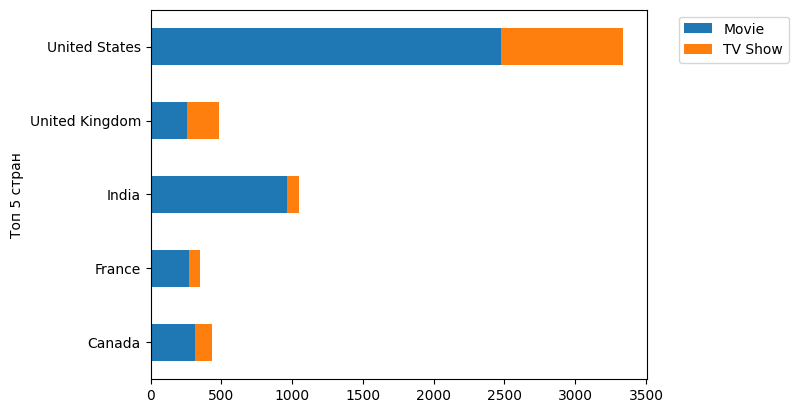

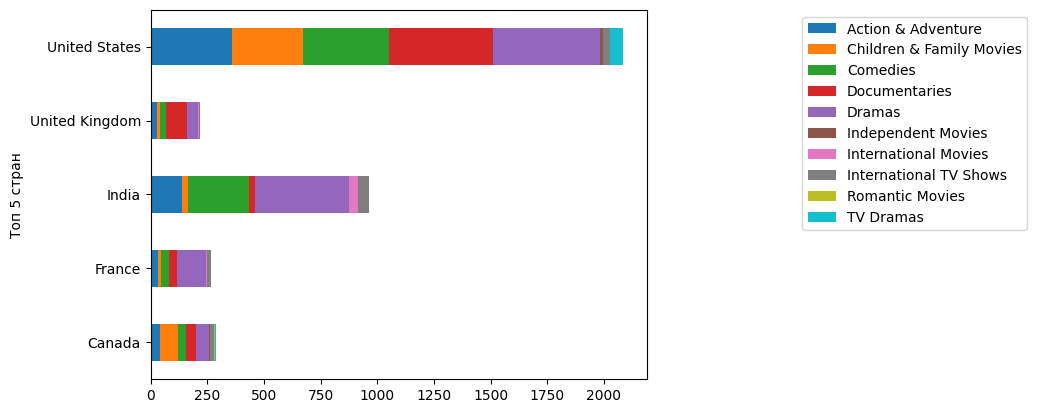

In [389]:
top_5_countries = countries_series.nlargest(n=5).keys()

def set_top_country(countries: list[str]):
    country = set(countries).intersection(top_5_countries)
    if (len(country) > 0):
        return list(country)[0]

data['top_country'] = (
    data['country']
        .dropna()
        .apply(split_values)
        .apply(set_top_country)
)

(
    data
        .groupby('top_country')['type']
        .value_counts()
        .unstack()
        .plot(kind='barh', stacked=True)
)

plt.ylabel('Топ 5 стран')
plt.legend(bbox_to_anchor = (1.3, 1)) #переместить легенду
plt.show()

top_10_genres = (
    get_filtered_series(data, 'listed_in', 0)
        .head(10)
        .keys()
)

def set_top_genres(listed_in: str):
    splitted = listed_in.split(', ')
    if (isinstance(splitted, str)):
        if (listed_in in top_10_genres):
            return listed_in
    elif (isinstance(splitted[0], str) & (splitted[0] in top_10_genres)):
        return splitted[0]

data['listed_in_processed'] = (
    data['listed_in']
        .dropna()
        .apply(set_top_genres)
        .dropna()
)

(
    data
        .groupby('top_country')['listed_in_processed']
        .value_counts()
        .unstack()
        .plot(kind='barh', stacked=True)
)

plt.ylabel('Топ 5 стран')
plt.legend(bbox_to_anchor = (1.3, 1)) #переместить легенду
plt.show()
